In [1]:
#!/usr/bin/env python
# coding: utf-8
# !pip install mediapy
import torch
from diffusers import StableDiffusionXLPipeline,DDIMScheduler, AutoencoderKL, UNet2DConditionModel
from PIL import Image
#from ip_adapter_bp import myIPAdapterXL
from ip_adapter import DDCA
# load ip-adapter
import glob
import wandb
from tqdm import tqdm
from ip_adapter.utils import register_cross_attention_hook, get_net_attn_map, attnmaps2images
import pandas as pd
import mediapy
import random
import pandas as pd



sdxl_model_path = "/hy-tmp/models/stable-diffusion-xl-base-1.0"
image_encoder_path = "/hy-tmp/models/IP-Adapter/models/image_encoder"

# sdxl_model_path = "/dfs/comicai/zhiyuan.shi/models/SG161222/RealVisXL_V3.0"
# image_encoder_path = "/dfs/comicai/zhengbing.yao/models/IP-Adapter/models/image_encoder/"

device = "cuda:0"
dtype = torch.float32


/usr/local/miniconda3/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

pipe = StableDiffusionXLPipeline.from_pretrained(
    #real_model_path,
    sdxl_model_path,
    torch_dtype=dtype,
#     unet=unet,
    use_safetensors= True,
    #
    #scheduler=noise_scheduler,
    safety_checker=None,
    add_watermarker=False,
)


#pipe.unet = register_cross_attention_hook(pipe.unet)

Keyword arguments {'safety_checker': None} are not expected by StableDiffusionXLPipeline and will be ignored.
Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  5.15it/s]


In [3]:
# infer_image_paths = glob.glob("/dfs/comicai/zhengbing.yao/datasets/1_ez_1031_2k/faces/*")
# image_paths = glob.glob("infer_images/faces/*")
data = pd.read_csv("/hy-tmp/datasts/data.csv")
image_paths = data["image_path"].to_list()
prompts = data["prompt"].to_list()
# image_paths = 

In [4]:
import copy
!nvidia-smi

Wed Oct  9 07:58:24 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-PCI...  Off  | 00000000:1C:00.0 Off |                    0 |
| N/A   41C    P0    33W / 250W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Token indices sequence length is longer than the specified maximum sequence length for this model (145 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["a mesmerizing portrayal of this iconic bird. each stitch is expertly placed to emphasize the peacock's regal pose and proud demeanor, making it a striking addition to any project. whether adorning a garment, accessory, or home décor item, this exquisite embroidery design is sure to captivate and inspire all who behold it."]
Token indices sequence length is longer than the specified maximum sequence length for this model (145 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["a mesmerizing portrayal of this iconic bird. each stitch is expertly placed to emphasize the peacock's

The next embroidery design in this collection features a graceful peacock, meticulously embroidered with dazzling threads that shimmer with iridescent colors. The peacock's majestic feathers are intricately stitched to capture their intricate patterns and vibrant hues, creating a stunning visual display that symbolizes beauty and elegance. The embroidery style seamlessly blends traditional craftsmanship with a contemporary flair, resulting in a mesmerizing portrayal of this iconic bird. Each stitch is expertly placed to emphasize the peacock's regal pose and proud demeanor, making it a striking addition to any project. Whether adorning a garment, accessory, or home décor item, this exquisite embroidery design is sure to captivate and inspire all who behold it.



100%|██████████| 50/50 [00:10<00:00,  4.60it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["and vibrant interpretation of floral motifs. every stitch is placed with precision to capture the essence of each flower's form and texture, making the design both charming and visually captivating. whether embellishing clothing, accessories, or home décor items, this enchanting embroidery design exudes a sense of joy and positivity, celebrating the beauty and wonder of the natural world."]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["and vibrant interpretation of floral motifs. every stitch is placed with precision to capture the essence of each flower's form and texture, making the design both charming and visually captivating. whether embellishing clothing, accessories, or home décor items, this enchanting embroidery design exudes a sense of joy and positivity, celebrating 

Another exquisite embroidery design in this collection depicts a whimsical array of blooming flowers, intricately stitched with a rich palette of colors and fine detailing. Each flower is meticulously crafted to showcase its unique beauty and delicate petals, bringing a touch of nature's elegance into any project. The embroidery style expertly combines traditional techniques with a modern sensibility, creating a fresh and vibrant interpretation of floral motifs. Every stitch is placed with precision to capture the essence of each flower's form and texture, making the design both charming and visually captivating. Whether embellishing clothing, accessories, or home décor items, this enchanting embroidery design exudes a sense of joy and positivity, celebrating the beauty and wonder of the natural world.



100%|██████████| 50/50 [00:10<00:00,  4.58it/s]


,,

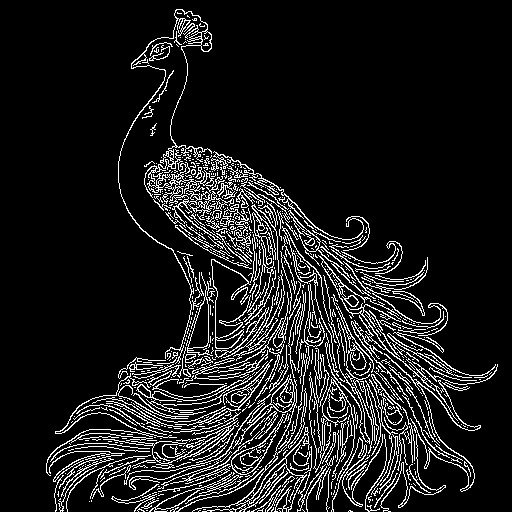
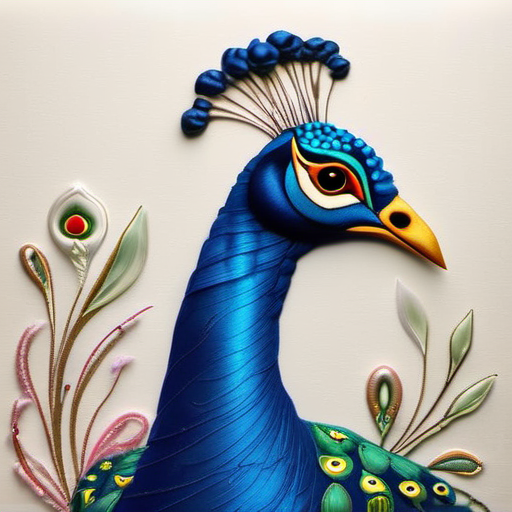
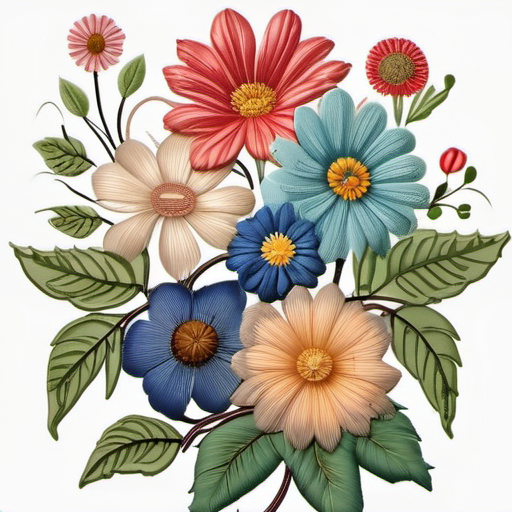

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["a mesmerizing portrayal of this iconic bird. each stitch is expertly placed to emphasize the peacock's regal pose and proud demeanor, making it a striking addition to any project. whether adorning a garment, accessory, or home décor item, this exquisite embroidery design is sure to captivate and inspire all who behold it."]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["a mesmerizing portrayal of this iconic bird. each stitch is expertly placed to emphasize the peacock's regal pose and proud demeanor, making it a striking addition to any project. whether adorning a garment, accessory, or home décor item, this exquisite embroidery design is sure to captivate and inspire all who behold it."]


The next embroidery design in this collection features a graceful peacock, meticulously embroidered with dazzling threads that shimmer with iridescent colors. The peacock's majestic feathers are intricately stitched to capture their intricate patterns and vibrant hues, creating a stunning visual display that symbolizes beauty and elegance. The embroidery style seamlessly blends traditional craftsmanship with a contemporary flair, resulting in a mesmerizing portrayal of this iconic bird. Each stitch is expertly placed to emphasize the peacock's regal pose and proud demeanor, making it a striking addition to any project. Whether adorning a garment, accessory, or home décor item, this exquisite embroidery design is sure to captivate and inspire all who behold it.



100%|██████████| 50/50 [00:10<00:00,  4.55it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["and vibrant interpretation of floral motifs. every stitch is placed with precision to capture the essence of each flower's form and texture, making the design both charming and visually captivating. whether embellishing clothing, accessories, or home décor items, this enchanting embroidery design exudes a sense of joy and positivity, celebrating the beauty and wonder of the natural world."]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["and vibrant interpretation of floral motifs. every stitch is placed with precision to capture the essence of each flower's form and texture, making the design both charming and visually captivating. whether embellishing clothing, accessories, or home décor items, this enchanting embroidery design exudes a sense of joy and positivity, celebrating 

Another exquisite embroidery design in this collection depicts a whimsical array of blooming flowers, intricately stitched with a rich palette of colors and fine detailing. Each flower is meticulously crafted to showcase its unique beauty and delicate petals, bringing a touch of nature's elegance into any project. The embroidery style expertly combines traditional techniques with a modern sensibility, creating a fresh and vibrant interpretation of floral motifs. Every stitch is placed with precision to capture the essence of each flower's form and texture, making the design both charming and visually captivating. Whether embellishing clothing, accessories, or home décor items, this enchanting embroidery design exudes a sense of joy and positivity, celebrating the beauty and wonder of the natural world.



100%|██████████| 50/50 [00:11<00:00,  4.54it/s]


,,

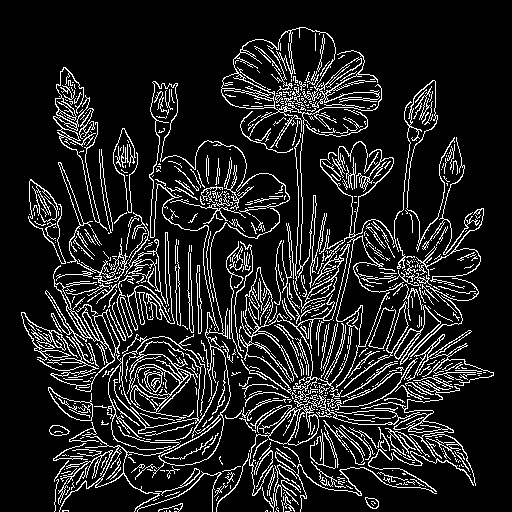
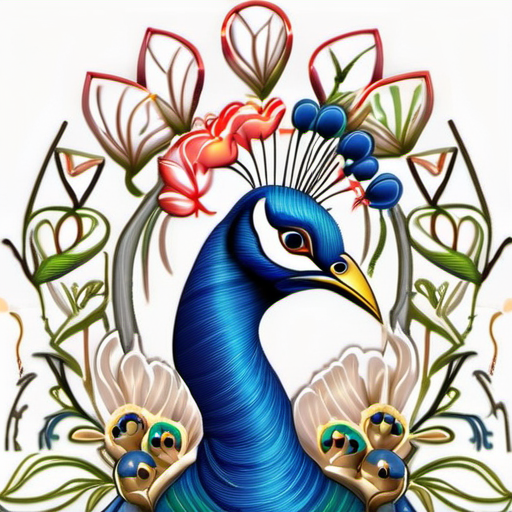
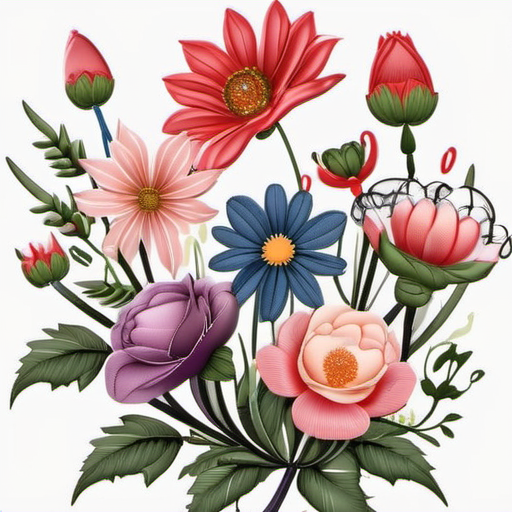

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["a mesmerizing portrayal of this iconic bird. each stitch is expertly placed to emphasize the peacock's regal pose and proud demeanor, making it a striking addition to any project. whether adorning a garment, accessory, or home décor item, this exquisite embroidery design is sure to captivate and inspire all who behold it."]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["a mesmerizing portrayal of this iconic bird. each stitch is expertly placed to emphasize the peacock's regal pose and proud demeanor, making it a striking addition to any project. whether adorning a garment, accessory, or home décor item, this exquisite embroidery design is sure to captivate and inspire all who behold it."]


The next embroidery design in this collection features a graceful peacock, meticulously embroidered with dazzling threads that shimmer with iridescent colors. The peacock's majestic feathers are intricately stitched to capture their intricate patterns and vibrant hues, creating a stunning visual display that symbolizes beauty and elegance. The embroidery style seamlessly blends traditional craftsmanship with a contemporary flair, resulting in a mesmerizing portrayal of this iconic bird. Each stitch is expertly placed to emphasize the peacock's regal pose and proud demeanor, making it a striking addition to any project. Whether adorning a garment, accessory, or home décor item, this exquisite embroidery design is sure to captivate and inspire all who behold it.



100%|██████████| 50/50 [00:10<00:00,  4.55it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["and vibrant interpretation of floral motifs. every stitch is placed with precision to capture the essence of each flower's form and texture, making the design both charming and visually captivating. whether embellishing clothing, accessories, or home décor items, this enchanting embroidery design exudes a sense of joy and positivity, celebrating the beauty and wonder of the natural world."]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["and vibrant interpretation of floral motifs. every stitch is placed with precision to capture the essence of each flower's form and texture, making the design both charming and visually captivating. whether embellishing clothing, accessories, or home décor items, this enchanting embroidery design exudes a sense of joy and positivity, celebrating 

Another exquisite embroidery design in this collection depicts a whimsical array of blooming flowers, intricately stitched with a rich palette of colors and fine detailing. Each flower is meticulously crafted to showcase its unique beauty and delicate petals, bringing a touch of nature's elegance into any project. The embroidery style expertly combines traditional techniques with a modern sensibility, creating a fresh and vibrant interpretation of floral motifs. Every stitch is placed with precision to capture the essence of each flower's form and texture, making the design both charming and visually captivating. Whether embellishing clothing, accessories, or home décor items, this enchanting embroidery design exudes a sense of joy and positivity, celebrating the beauty and wonder of the natural world.



100%|██████████| 50/50 [00:11<00:00,  4.51it/s]


,,

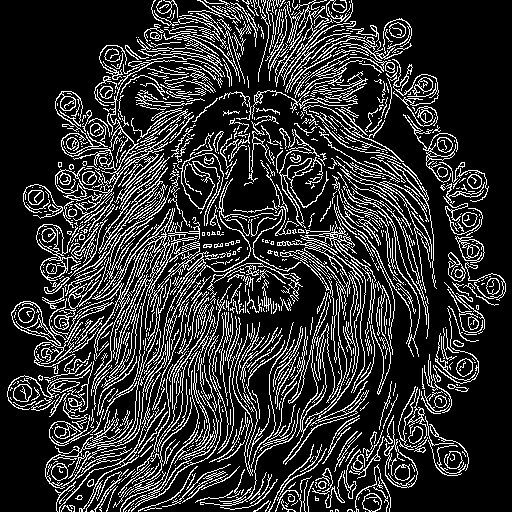
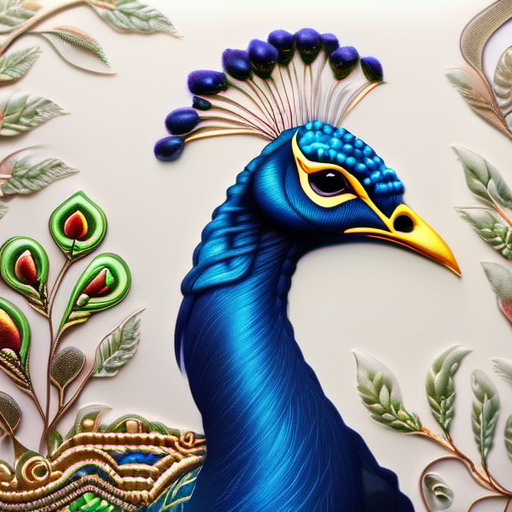
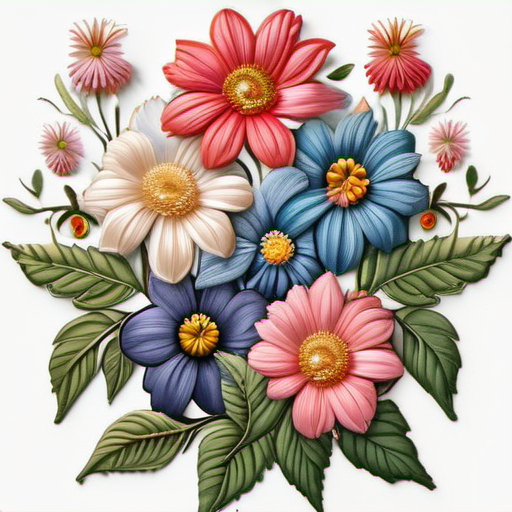

In [10]:
import copy
import glob
import numpy as np

# def padding(image):
#     w, h = image.size
#     max_edge = max(w, h)
#     image = np.array(image)
#     ph, pw = max_edge - h, max_edge - w
#     new_image = np.ones([max_edge, max_edge, 3], dtype=np.uint8) * 0
#     new_image[ph // 2:ph // 2 + h, pw // 2:pw // 2 + w,:] = image

#     image = Image.fromarray(new_image)
#     return image
sd_pipe = copy.deepcopy(pipe)
    
ip_ckpt = "YZBPXX/CCDA/model.pth"
ip_ckpt = "/hy-tmp/models/my-ipadapter/exp1/checkpoint-10000/model.pth"
opt = {
    "select_token":[0,4,5,8,9],
    "only_text":False,
    "only_image":False,
    "only_text_left_image":False,

}
ip_model = DDCA(sd_pipe, 
              image_encoder_path,
              ip_ckpt,
#                                   ip_ckpt+"/model.pth", 
              device, 
              scale=1, 
              dtype=dtype,
              num_tokens=16,
              opt=opt
             )


for image_path in image_paths[:3]:


    
    # face = padding(image)
    image_path = "/hy-tmp/datasts/" + image_path
    # prompt = prompts[0]
    ip_image_path = image_path.replace("images", "process_images")
    image = Image.open(ip_image_path).convert("RGB")
    # prompts = [
    #     "a old man is reading a book in classroom, full body",
    #     "a old man is is dancing on the beach, full body",
    #     "a old man are walking in garden, full body",
    # ] 
    prompt_images = []
    for prompt in prompts[:2]:
        print(prompt)
        tokens = ip_model.pipe.tokenizer.encode(prompt)
        tokens = [pipe.tokenizer.decode(token) for token in tokens]

        width = 512
        height = 512
        images = ip_model.generate(
                        pil_image=image,
                        prompt=prompt,
                        negative_prompt="",
                        num_samples=1,                                                                                                                                                                                                                                                                 
                        num_inference_steps=50,
                        width=width, height=height,
                        seed=2023)
    
        prompt_images.append(images[0])
        
    mediapy.show_images([image]+prompt_images)
#         attn_map = get_net_attn_map((height, width))
#         attn_hot = attnmaps2images(attn_map, images[0])
#         mediapy.show_images(attn_hot)
#         attn_maps = get_net_attn_map((height, width))
#         for attn_map in attn_maps:
#             attn_hot = attnmaps2images(attn_map)
#             mediapy.show_images(attn_hot)

del ip_model.pipe
del ip_model
del sd_pipe
